<a href="https://colab.research.google.com/github/gaganchapa/Bank_Customer_Satisfaction/blob/main/Bank_Customer_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [9]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git


fatal: destination path 'Data-Files-for-Feature-Selection' already exists and is not an empty directory.


In [10]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [12]:
y = data['TARGET']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [14]:
X_train.shape, X_test.shape


((60816, 369), (15204, 369))

In [15]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [16]:
X_train_T = X_train.T
X_test_T = X_test.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape

(273, 60816)

In [17]:
X_train_T.duplicated().sum()

17

In [18]:
duplicated_features = X_train_T.duplicated()
duplicated_features[70:90]

70    False
71    False
72     True
73    False
74     True
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
dtype: bool

In [19]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep[70:90]

[True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [20]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [21]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [22]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [24]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [25]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [26]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [27]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 254, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           6208      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 64)          2

In [29]:
ep=25

In [30]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=ep, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
1901/1901 [==============================] - 115s 59ms/step - loss: 0.1883 - accuracy: 0.9592 - val_loss: 0.1589 - val_accuracy: 0.9604
Epoch 2/25
1901/1901 [==============================] - 111s 58ms/step - loss: 0.1622 - accuracy: 0.9604 - val_loss: 0.1593 - val_accuracy: 0.9604
Epoch 3/25
1901/1901 [==============================] - 113s 60ms/step - loss: 0.1550 - accuracy: 0.9603 - val_loss: 0.1493 - val_accuracy: 0.9604
Epoch 4/25
1901/1901 [==============================] - 111s 59ms/step - loss: 0.1524 - accuracy: 0.9603 - val_loss: 0.1498 - val_accuracy: 0.9604
Epoch 5/25
1901/1901 [==============================] - 111s 58ms/step - loss: 0.1508 - accuracy: 0.9603 - val_loss: 0.1463 - val_accuracy: 0.9604
Epoch 6/25
1901/1901 [==============================] - 111s 58ms/step - loss: 0.1508 - accuracy: 0.9604 - val_loss: 0.1500 - val_accuracy: 0.9603
Epoch 7/25
1901/1901 [==============================] - 116s 61ms/step - loss: 0.1496 - accuracy: 0.9604 - val_loss: 0

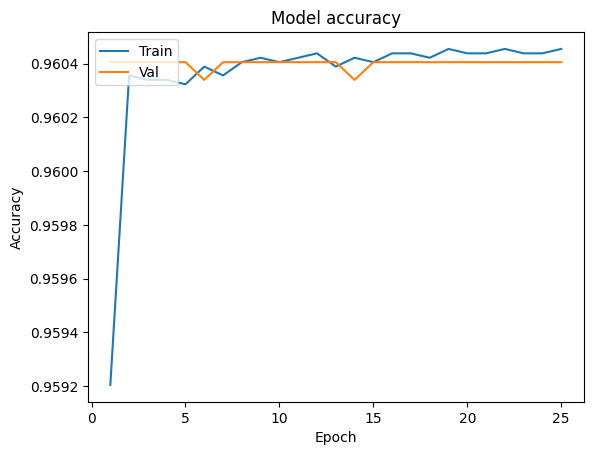

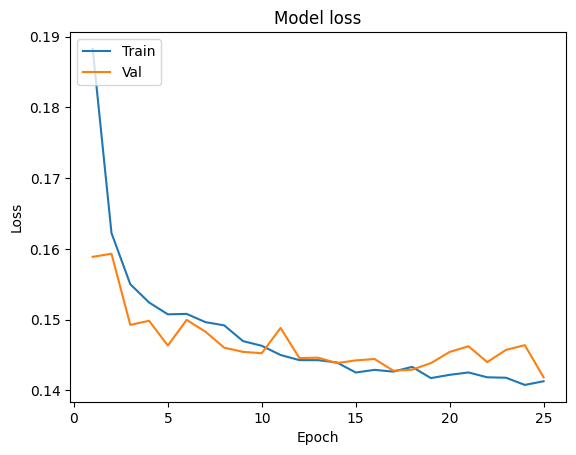

In [31]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, ep)